# Task_1: *Predict the percentage of an student based on the no. of study hours.*

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Visualizations 

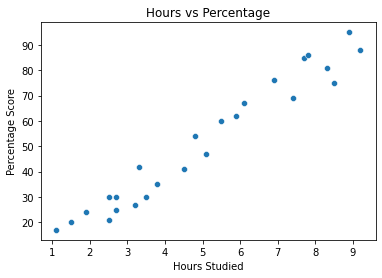

In [3]:
# Plot scatter
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing data

In [4]:
# Split data into features and target data
X = df['Hours'].values
y = df['Scores'].values

# split into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# check shape of training and testing dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20,), (5,), (20,), (5,))

## Create Model

In [5]:
# Create model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit the model
model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

In [6]:
# Check model accuracy score
accuracy = model.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1)) * 100
accuracy

94.54906892105355

In [7]:
# Calculate Regression line values
line = model.coef_ * X + model.intercept_
line

array([[26.79480124, 52.56250809, 33.73226078, 86.25874013, 36.70545772,
        16.88414476, 93.19619966, 56.52677068, 84.27660883, 28.77693254,
        78.33021494, 60.49103328, 46.6161142 , 34.72332643, 12.91988217,
        90.22300272, 26.79480124, 20.84840735, 62.47316457, 75.357018  ,
        28.77693254, 49.58931115, 39.67865467, 70.40168976, 79.32128059]])

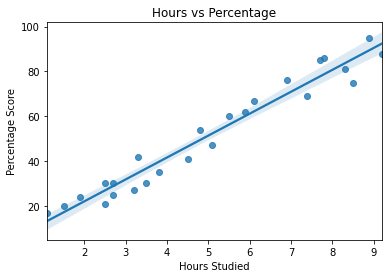

In [8]:
# Plot Regression line
sns.regplot(x=X, y=y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Making Predictions

In [9]:
y_pred = model.predict(X_test.reshape(-1, 1))
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

> **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [11]:
hours = float(input('Hours : '))
print(f'Predicted percentage score : {model.predict([[hours]])[0][0]}')

Hours : 9.25
Predicted percentage score : 93.69173248737535


## Evaluating the model

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test.reshape(-1, 1), y_pred)
# Calculate mean squared error
mse = mean_squared_error(y_test.reshape(-1, 1), y_pred)
# Calculate Root mean squared error
rmse = np.sqrt(mean_squared_error(y_test.reshape(-1, 1), y_pred))

print(f'Mean absolute error : \t\t{mae}')
print(f'Mean squared error : \t\t{mse}')
print(f'Root mean squared error : \t{rmse}')

Mean absolute error : 		4.183859899002975
Mean squared error : 		21.598769307217406
Root mean squared error : 	4.647447612100367
